In [14]:
"""
Machine Learning Gigs Data Analysis
-----------------------------------
This notebook analyzes data from ML related gigs, visualizing key metrics
like seller reviews, pricing, and popular keywords using dark-themed visualizations.

The analysis generates 5 visualizations saved to the 'visualizations' folder.
"""

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

# Create visualizations directory if it doesn't exist
os.makedirs('visualizations', exist_ok=True)

# Set matplotlib style to dark background
plt.style.use('dark_background')

# Load dataset using the correct path
df = pd.read_csv('ML-gigs.csv')

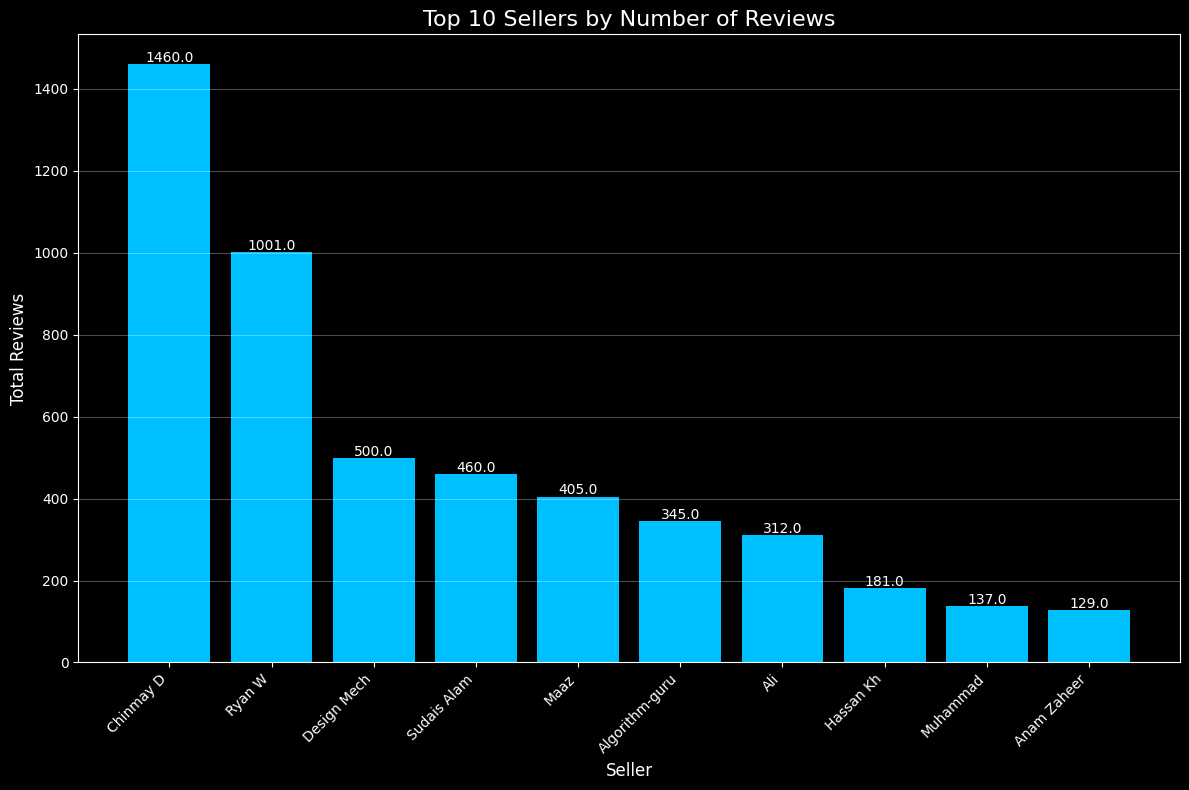

In [15]:
def analyze_top_sellers_by_reviews():
    """
    Analyze and visualize the top 10 sellers based on total number of reviews.
    
    This function:
    1. Cleans and processes the reviews data
    2. Groups by seller and calculates total reviews
    3. Visualizes the top 10 sellers as a bar chart
    4. Exports the visualization as a PNG file
    """
    # Convert 'reviews' to numeric and drop rows without it
    df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
    df_valid = df.dropna(subset=['reviews', 'seller'])
    
    # Group by seller and sum their reviews
    top_sellers_df = df_valid.groupby('seller')['reviews'].sum().reset_index()
    
    # Sort and get top 10 sellers by total reviews
    top_sellers_df = top_sellers_df.sort_values('reviews', ascending=False).head(10)
    top_sellers_df.columns = ['Seller', 'Total Reviews']
    
    # Plot with matplotlib
    plt.figure(figsize=(12, 8))
    plt.bar(top_sellers_df['Seller'], top_sellers_df['Total Reviews'], color='#00BFFF')
    plt.title('Top 10 Sellers by Number of Reviews', color='white', fontsize=16)
    plt.xlabel('Seller', color='white', fontsize=12)
    plt.ylabel('Total Reviews', color='white', fontsize=12)
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(top_sellers_df['Total Reviews']):
        plt.text(i, v+5, str(v), ha='center', color='white')
    
    plt.tight_layout()
    
    # Export as PNG
    plt.savefig('visualizations/ML_top_sellers_reviews.png', bbox_inches='tight', facecolor='#121212')
    plt.show()

# Execute visualization 1
analyze_top_sellers_by_reviews()

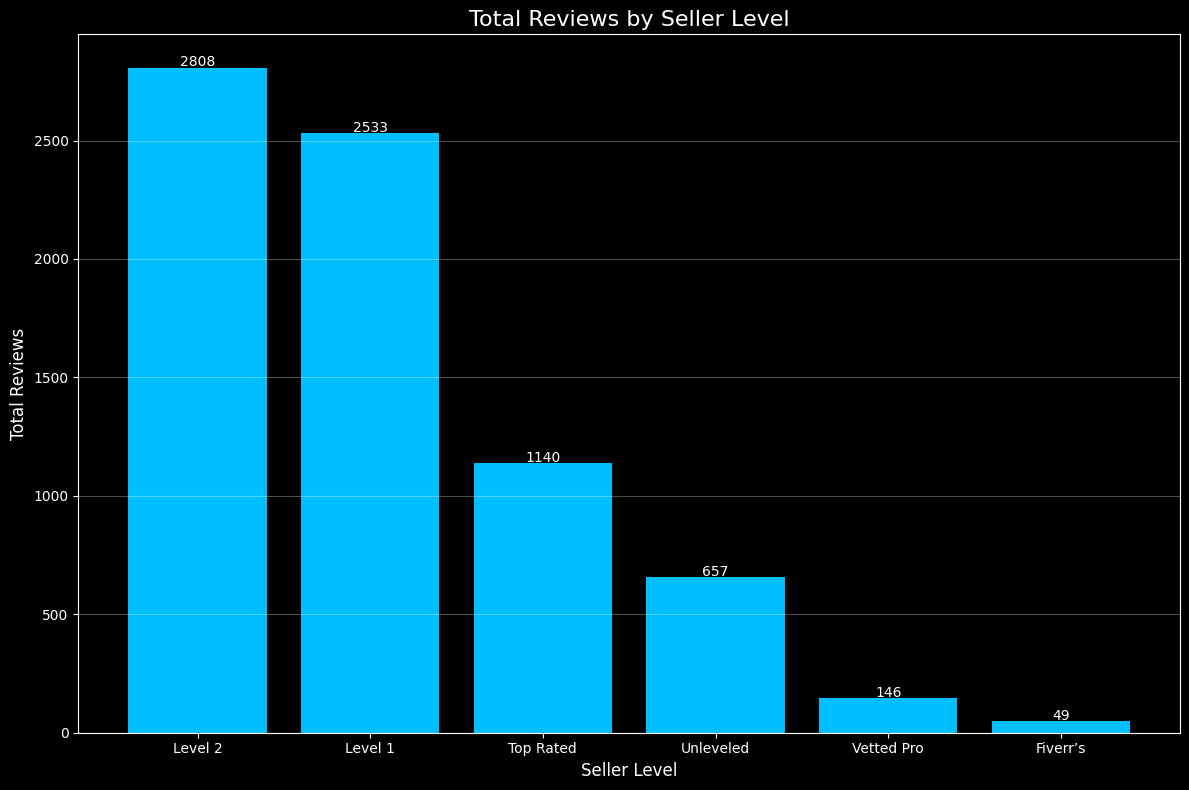

In [16]:
def analyze_reviews_by_seller_level():
    """
    Analyze and visualize the distribution of reviews across different seller levels.
    
    This function:
    1. Cleans and processes the reviews data
    2. Groups by seller level and calculates total reviews
    3. Visualizes the distribution as a bar chart
    4. Exports the visualization as a PNG file
    """
    # Ensure 'reviews' column is numeric and drop missing values
    df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
    df_clean = df.dropna(subset=['reviews', 'seller_level'])
    
    # Calculate total reviews by seller level
    reviews_by_level = df_clean.groupby('seller_level')['reviews'].sum().reset_index()
    reviews_by_level.columns = ['Seller Level', 'Total Reviews']
    reviews_by_level = reviews_by_level.sort_values('Total Reviews', ascending=False)
    
    # Plot with matplotlib
    plt.figure(figsize=(12, 8))
    plt.bar(reviews_by_level['Seller Level'], reviews_by_level['Total Reviews'], color='#00BFFF')
    plt.title('Total Reviews by Seller Level', color='white', fontsize=16)
    plt.xlabel('Seller Level', color='white', fontsize=12)
    plt.ylabel('Total Reviews', color='white', fontsize=12)
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(reviews_by_level['Total Reviews']):
        plt.text(i, v+5, str(int(v)), ha='center', color='white')
    
    plt.tight_layout()
    
    # Export as PNG
    plt.savefig('visualizations/ML_reviews_by_level.png', bbox_inches='tight', facecolor='#121212')
    plt.show()

# Execute visualization 2
analyze_reviews_by_seller_level()

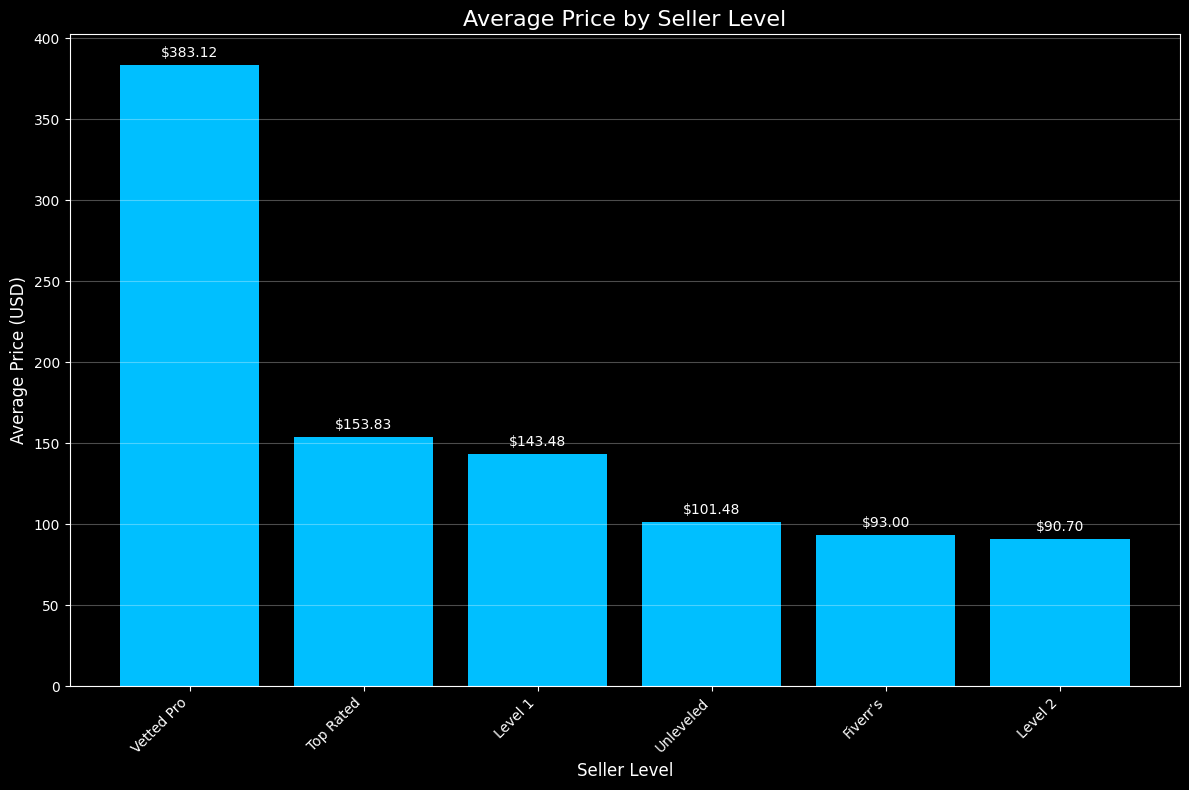

In [17]:
def analyze_price_by_seller_level():
    """
    Analyze and visualize the average price offered by different seller levels.
    
    This function:
    1. Cleans and processes the price data
    2. Groups by seller level and calculates average price
    3. Visualizes the average prices as a bar chart
    4. Exports the visualization as a PNG file
    """
    # Clean and convert 'price' to numeric
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    
    # Calculate average price by seller level
    avg_price_by_level = df.dropna(subset=['price']).groupby('seller_level')['price'].mean().reset_index()
    avg_price_by_level.columns = ['Seller Level', 'Average Price']
    avg_price_by_level['Average Price'] = avg_price_by_level['Average Price'].round(2)
    avg_price_by_level = avg_price_by_level.sort_values('Average Price', ascending=False)
    
    # Plot with matplotlib
    plt.figure(figsize=(12, 8))
    plt.bar(avg_price_by_level['Seller Level'], avg_price_by_level['Average Price'], color='#00BFFF')
    plt.title('Average Price by Seller Level', color='white', fontsize=16)
    plt.xlabel('Seller Level', color='white', fontsize=12)
    plt.ylabel('Average Price (USD)', color='white', fontsize=12)
    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(avg_price_by_level['Average Price']):
        plt.text(i, v+5, f'${v:.2f}', ha='center', color='white')
    
    plt.tight_layout()
    
    # Export as PNG
    plt.savefig('visualizations/ML_price_by_level.png', bbox_inches='tight', facecolor='#121212')
    plt.show()

# Execute visualization 3
analyze_price_by_seller_level()

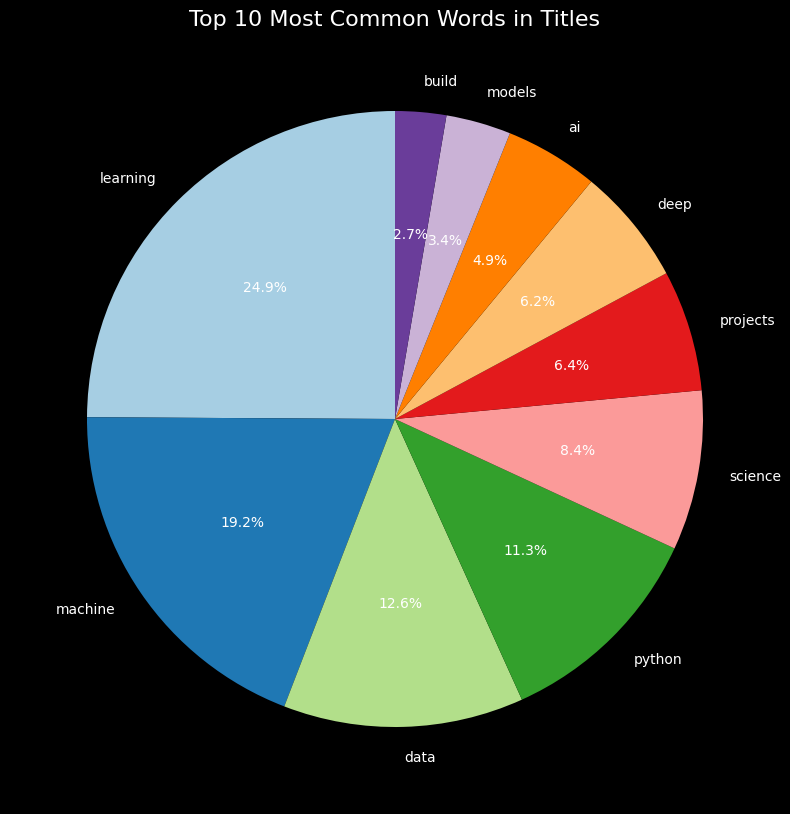

In [18]:
def analyze_common_title_words():
    """
    Analyze and visualize the most common words appearing in gig titles.
    
    This function:
    1. Defines and filters out common stopwords
    2. Tokenizes and cleans all title text
    3. Counts and identifies the top 10 most frequent words
    4. Visualizes the results as a pie chart
    5. Exports the visualization as a PNG file
    """
    # Define stopwords
    stopwords = {'will', 'i', 'and', 'do', 'the', 'to', 'in', 'for', 'a', 'of', 
                'on', 'with', 'by', 'that', 'as'}
    
    # Tokenize titles, clean text, remove stopwords
    tokens = [
        w for t in df['title'].dropna().astype(str)
        for w in re.sub(r'\W+', ' ', t.lower()).split()
        if w not in stopwords
    ]
    
    # Count top 10 keywords
    words, counts = zip(*Counter(tokens).most_common(10))
    
    # Plot pie chart with dark theme
    plt.figure(figsize=(10, 10))
    plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=90, 
            colors=plt.cm.Paired.colors, textprops={'color': 'white'})
    plt.title('Top 10 Most Common Words in Titles', color='white', fontsize=16)
    
    # Export as PNG
    plt.savefig('visualizations/ML_common_words.png', 
                bbox_inches='tight', facecolor='#121212')
    plt.show()

# Execute visualization 4
analyze_common_title_words()

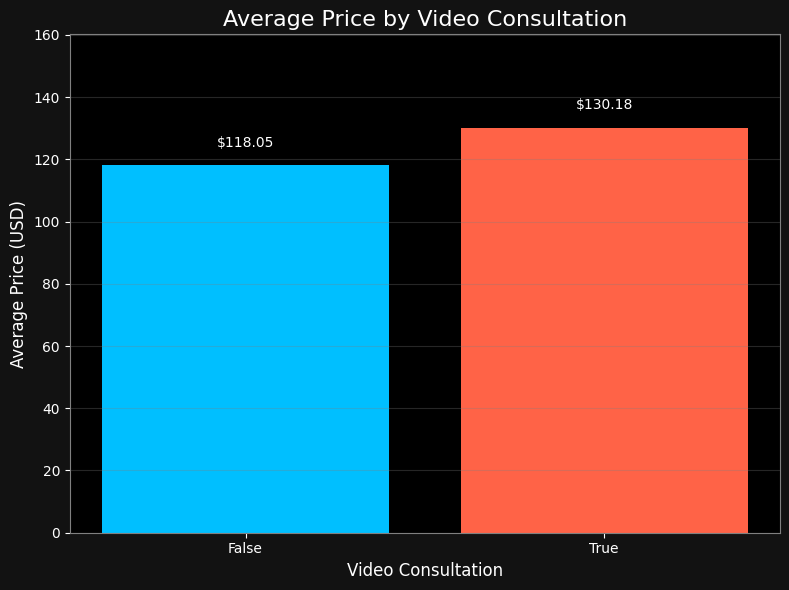

In [21]:
def analyze_price_by_video_consultation():
    """
    Analyze and visualize price differences between gigs offering video consultation and those that don't.
    
    This function:
    1. Cleans and processes the price and video consultation data
    2. Groups by video consultation status and calculates average prices
    3. Creates a visually appealing bar chart with value annotations
    4. Exports the visualization as a PNG file
    """
    # Ensure 'price' is numeric and remove rows with missing price or video consultation
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df_clean = df.dropna(subset=['price', 'video_consultation'])
    
    # Calculate average price by video consultation status
    avg_price_video = df_clean.groupby('video_consultation')['price'].mean().reset_index()
    avg_price_video.columns = ['Video Consultation', 'Average Price']
    avg_price_video['Average Price'] = avg_price_video['Average Price'].round(2)
    
    # Prepare data for plotting
    labels = avg_price_video['Video Consultation'].astype(str)
    values = avg_price_video['Average Price']
    
    # Bar chart with annotated prices and dark theme
    plt.figure(figsize=(8, 6), facecolor='#121212')
    bars = plt.bar(labels, values, color=['#00BFFF', '#FF6347'])
    plt.title('Average Price by Video Consultation', color='white', fontsize=16)
    plt.xlabel('Video Consultation', color='white', fontsize=12)
    plt.ylabel('Average Price (USD)', color='white', fontsize=12)
    plt.ylim(0, max(values) + 30)
    plt.grid(axis='y', alpha=0.3, color='gray')
    plt.tick_params(colors='white')
    
    # Change spines color
    for spine in plt.gca().spines.values():
        spine.set_color('gray')
    
    # Add value labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'${height:.2f}',
                ha='center', va='bottom', fontsize=10, color='white')
    
    plt.tight_layout()
    
    # Export as PNG
    plt.savefig('visualizations/ML_price_by_video.png', 
                bbox_inches='tight', facecolor='#121212')
    plt.show()

# Execute visualization 5
analyze_price_by_video_consultation()